In [1]:
import glob

In [2]:
list_of_filesB = glob.glob('Dataset-20201023T162720Z-001/Dataset/B/sys/*.txt')
list_of_filesM = glob.glob('Dataset-20201023T162720Z-001/Dataset/B/sys/*.txt')

In [3]:
def FileToList(filename):
    f = open(filename)
    l = []
    for line in f:
        l.append(line)
    f.close()
    return l

In [4]:
l = []
wordSet = set([])
for filename in list_of_filesB:
    l = FileToList(filename)
    wordSet = wordSet.union(set(l))
l = []
for filename in list_of_filesM:
    l = FileToList(filename)
    wordSet = wordSet.union(set(l))

In [5]:
l = []
output = []
for filename in list_of_filesB:
    wordDict = dict.fromkeys(wordSet,0)#TwoSequence,0)
    l1 = FileToList(filename)
    for word in l1:
        wordDict[word] += 1
    l.append(wordDict)
    output.append(0)
for filename in list_of_filesM:
    wordDict = dict.fromkeys(wordSet,0)#TwoSequence,0)
    l1 = FileToList(filename)
    for word in l1:
        wordDict[word] += 1
    l.append(wordDict)
    output.append(1)

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer

In [8]:
import pandas as pd

In [9]:
df = pd.DataFrame(l)

In [10]:
tf_transformer = TfidfTransformer(use_idf=False).fit(df)

In [11]:
df1 = pd.DataFrame()

In [12]:
df1 = tf_transformer.transform(df)

In [13]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [14]:
km = KMeans(n_clusters=2)

In [15]:
y_predicted = km.fit_predict(df1)

In [16]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [30]:
MSE = []

In [18]:
op = np.array(output)

In [22]:
y_p_dbscan = DBSCAN(eps = 1,min_samples=4).fit_predict(df1)

In [26]:
from sklearn.metrics.cluster import adjusted_rand_score

In [31]:
MSE.append(adjusted_rand_score(y_predicted,output))

In [32]:
MSE.append(adjusted_rand_score(y_p_dbscan,output))

In [33]:
MSE

[-8.9783271599506e-05, -6.525991840773364e-07]

In [34]:
import matplotlib.pyplot as plt

In [35]:
x = np.array(MSE)

In [36]:
x = -x

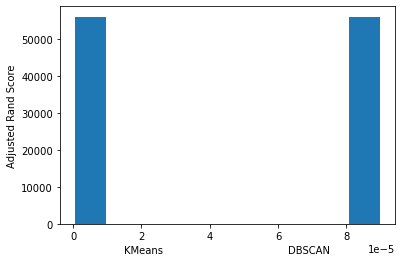

In [43]:
plt.hist(x, density=True, bins=10)  # `density=False` would make counts
plt.ylabel('Adjusted Rand Score')
plt.xlabel('KMeans                                        DBSCAN');